# Testing `bindsnet.Monitor` object

In [1]:
import torch
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet')))
sys.path.append(os.path.abspath(os.path.join('..', '..', 'bindsnet', 'network')))

from network     import Network, Monitor
from connections import Connection
from nodes       import McCullochPitts, Input

%matplotlib inline

In [2]:
network = Network(dt=1.0)

n_neurons = 25

input_layer = Input(n=n_neurons)
mp_layer = McCullochPitts(n=n_neurons)

network.add_layer(input_layer, name='input')
network.add_layer(mp_layer, name='MP')

connection = Connection(source=input_layer, target=mp_layer)
network.add_connection(connection, source='input', target='MP')

voltage_monitor = Monitor(mp_layer, state_vars=['v'])
network.add_monitor(voltage_monitor, name='v_monitor')

In [3]:
time = 100  # Simulation time
p_fire = 0.1  # Bernoulli probability of input neuron spiking

# Input spikes are Bernoulli experiments with spike prob. `p_fire`.
inpt = np.random.binomial(1, p_fire, [n_neurons, time])
inpt = torch.from_numpy(inpt)

In [4]:
spikes = network.run(inpts={'input' : inpt}, time=100)

In [5]:
voltages = voltage_monitor.get('v')

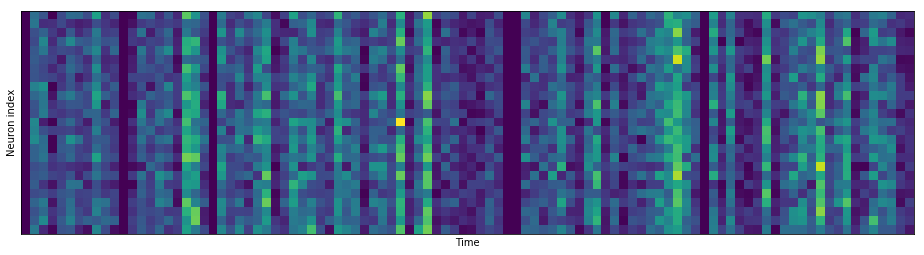

In [6]:
plt.matshow(voltages)
plt.xticks(()); plt.yticks(());
plt.xlabel('Time'); plt.ylabel('Neuron index');

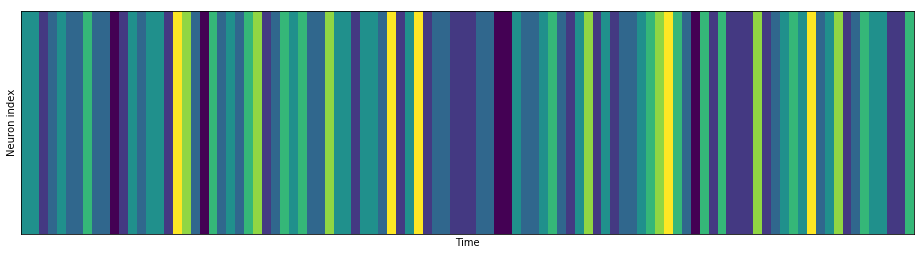

In [8]:
plt.matshow(torch.stack([inpt.sum(0)] * n_neurons))
plt.xticks(()); plt.yticks(())
plt.xlabel('Time'); plt.ylabel('Neuron index');